# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [10]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)
import pandas as pd

#導入影像列印模組
import matplotlib.pyplot as plt

# 資料準備

In [7]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data(label_mode="fine")

In [8]:
print("train:",len(x_train))
print("test: ",len(x_test))

train: 50000
test:  10000


In [12]:
# 查詢檔案維度資訊
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test  shape:",x_test.shape)
print("y_test  shape:",y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test  shape: (10000, 32, 32, 3)
y_test  shape: (10000, 1)


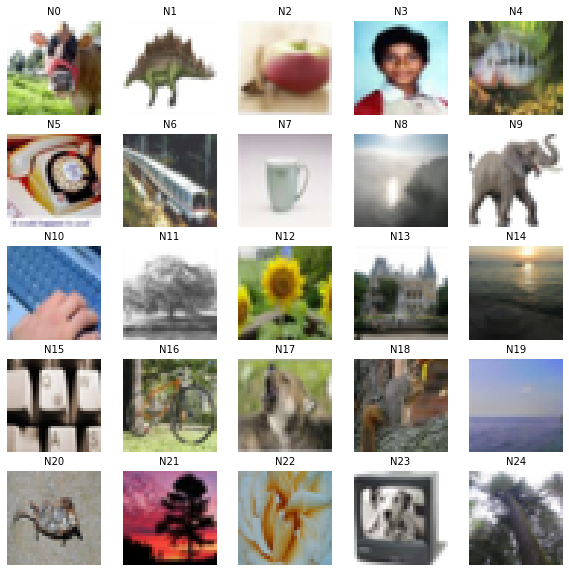

In [16]:
#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,idx,num=25):
    
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    if num>25:num=25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap="binary")
        
        title = "N"+str(i)
        if len(prediction)>0:
            title+="=>"+ str(prediction[i])
            
        ax.set_title(title,fontsize=10)
        plt.axis("off")
        idx+=1
    plt.show()

#針對不同的影像作標記    
plot_images_labels_prediction(x_train,y_train,[],0)

# Image normalize 

In [18]:
x_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [19]:
x_train_nor = x_train.astype("float32") / 255.0
x_test_nor = x_test.astype("float32") / 255.0

In [20]:
x_train_nor[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [21]:
y_train.shape

(50000, 1)

In [22]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [23]:
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot = np_utils.to_categorical(y_test)

In [24]:
y_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.